# Neuron or Perceptron: The foundation of all Deep Learning Networks
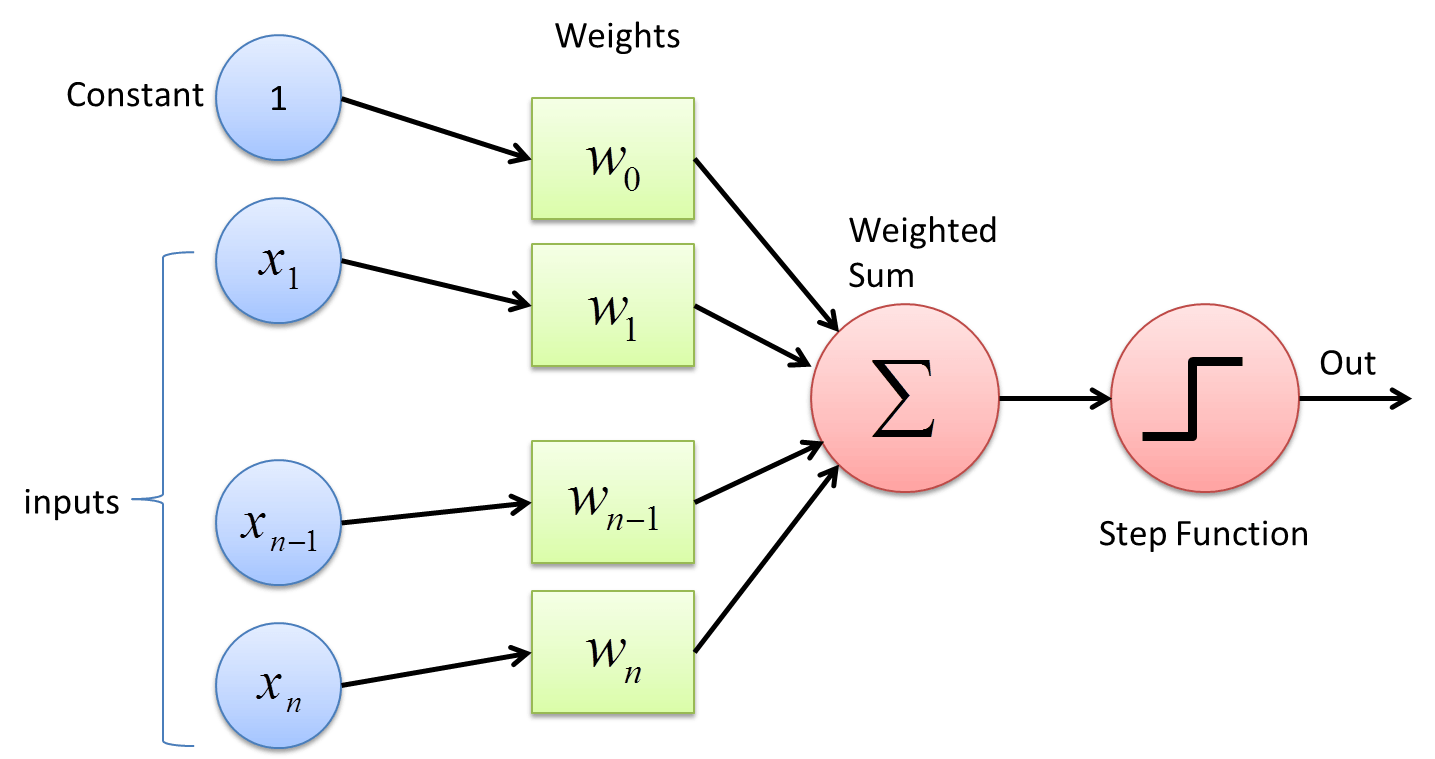

* What it is: In the context of artificial neural networks, a neuron or perceptron is the basic building block. Think of a neuron as a tiny decision-making unit. It takes in some information, processes it, and produces an output. It's like a small decision-making entity.
* Components:
 * Input: Neurons take inputs, which can be values representing features.
 * Weights: Each input has an associated weight, which signifies the importance of that input. Think of it as the strength of a connection between two pieces of information.
 * Bias: Bias is an additional parameter in a model that allows it to make predictions even when all input features are zero. If you were predicting someone's weight based on their height, bias is like a starting point. Even if someone has zero height (which is impossible, but for illustration), there's still a base weight.
 ### **WEIGHTS AND BIASES ARE THE ONLY THINGS THAT ARE UPDATED DURING THE TRAINING PHASE**
* Summation: The neuron adds up the products of inputs and their weights. It's like weighing the importance of different pieces of information before making a decision.
* Activation Function: After summation, the neuron applies an activation function. This function decides whether the neuron should "fire" and produce an output. It's like deciding whether the neuron is activated or not based on the total weighted input.
* Example: If you were deciding whether to go outside based on the weather, your neuron might take inputs like temperature, humidity, and wind speed. Each of these inputs has a weight, signifying their importance. The neuron adds up these weighted inputs, applies a decision rule (activation function), and decides whether it's a good day to go outside.

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the input x1,  x2,  x3
inputs = np.array([0.5, 0.3, 0.2])

# Initialize weights and bias
weights = np.random.rand(len(inputs))
bias = np.random.rand(1)

# Compute the weighted sum of inputs + bias
total_input = np.dot(inputs, weights) + bias # y_sum

# Apply the activation function
output = sigmoid(total_input)

print("Output of the neuron:", output)

Output of the neuron: [0.72492903]


* Other terms to know about:
    * **Learning Rate:** In the context of machine learning, the learning rate is like the step size that a model takes during training to minimize errors. Imagine you're trying to find the lowest point in a hilly area. The learning rate is how big of steps you take. Too big, and you might overshoot the lowest point; too small, and it might take forever to get there.
    * **Batch Size:** During training, you don't always use all your data at once. Batch size is the number of data points you use in one iteration. If you're learning from a cookbook, a batch size of 1 is like trying a recipe one ingredient at a time, and a batch size of 10 is like trying to cook with ten ingredients at once.
    * **Epoch:** An epoch is one complete pass through the entire training dataset during the training of a model. If you're learning from a book, one epoch is like reading through the entire book from start to finish. Doing it multiple times (multiple epochs) helps you understand the book better.
    * **Layer:** In a neural network, a layer is a fundamental building block that organizes and processes data. It is a grouping of nodes that collectively perform a specific function, whether it's receiving input, extracting features, or producing the final output. The arrangement and connections between these layers enable the network to learn and make predictions based on the input data.
    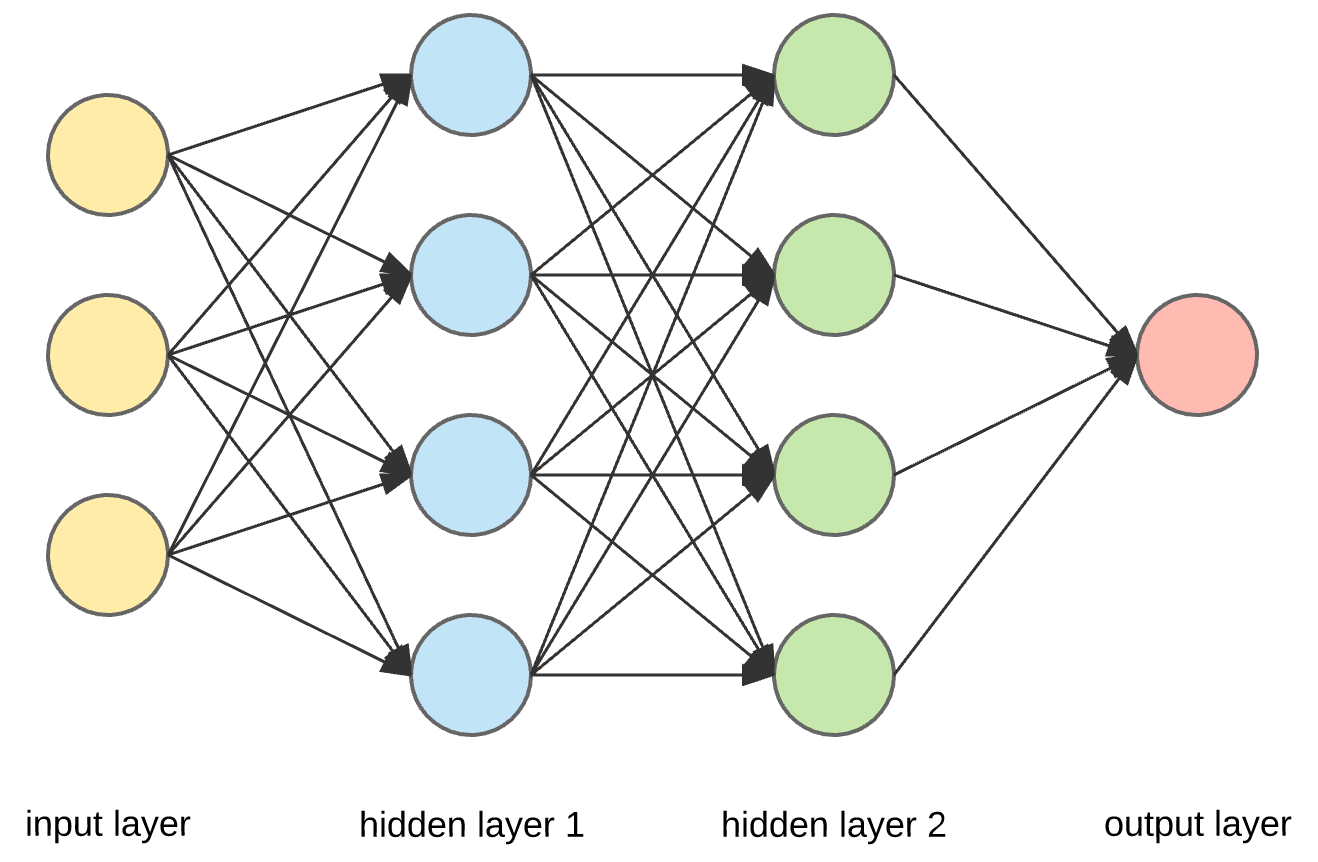
    * **Dense Layer:** In a dense layer, each node in the current layer is connected to every node in the previous layer and every node in the next layer. This means that all the neurons in one layer are densely connected to all the neurons in the adjacent layers.
    * **More Kinds of Layers:** https://keras.io/api/layers/
    * **Loss Function, or Cost Function:** A loss function is a mathematical function that calculates the difference between the predicted output of a machine learning model and the actual target values. It quantifies the error between what your model predicts and what it should predict, DURING THE TRAINING PHASE. You can use the current loss value to correct your models.
    * **Metric:** A metric is a measurement used to evaluate the performance of a machine learning model, AFTER THE TRAINING HAS BEEN COMPLETED. Unlike the loss function, which is used during the training process to guide the model, a metric is a tool for you to assess how well your model is doing after it has been trained.

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Define the input
inputs = np.array([[0.5, 0.3, 0.2],
                   [0.9, 0.4, 0.7],
                   [0.3, 0.9, 0.5]])

# Define the expected output
expected_output = np.array([[1], [0], [1]])

# Initialize weights and biases
input_layer_neurons = inputs.shape[1]
hidden_layer_neurons = 4
output_neurons = 1

hidden_weights = np.random.rand(input_layer_neurons, hidden_layer_neurons)
hidden_bias = np.random.rand(1, hidden_layer_neurons)
output_weights = np.random.rand(hidden_layer_neurons, output_neurons)
output_bias = np.random.rand(1, output_neurons)

# Learning rate
lr = 0.1

# Training the neural network
for epoch in range(10000):
    # Forward Propagation
    hidden_layer_activation = np.dot(inputs, hidden_weights) + hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_activation)

    output_layer_activation = np.dot(hidden_layer_output, output_weights) + output_bias
    predicted_output = sigmoid(output_layer_activation)

    # Compute error/loss
    error = expected_output - predicted_output

    # Backpropagation
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(output_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Updating Weights and Biases
    output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr
    output_bias += np.sum(d_predicted_output, axis=0, keepdims=True) * lr
    hidden_weights += inputs.T.dot(d_hidden_layer) * lr
    hidden_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * lr

print("Final output after training:")
print(predicted_output)

Final output after training:
[[0.96427665]
 [0.04067651]
 [0.98389607]]


# Activation Functions

## Why are activation functions essential?

* Without activation functions, neural networks would just consist of linear operations like matrix multiplication. All layers would perform linear transformations of the input, and no non-linearities would be introduced.

* Most real-world data is non-linear. For example, relationships between house prices and size, income, and purchases, etc., are non-linear. If neural networks had no activation functions, they would fail to learn the complex non-linear patterns that exist in real-world data.

* Activation functions enable neural networks to learn these non-linear relationships by introducing non-linear behaviors through activation functions. This greatly increases the flexibility and power of neural networks to model complex and nuanced data.

## Types of Activation Functions

### Sigmoid Activation

*It takes a real-valued input and squashes it to a value between 0 and 1. The sigmoid function has an "S"-shaped curve that asymptotes to 0 for large negative numbers and 1 for large positive numbers. The outputs can be easily interpreted as probabilities, which makes it natural for binary classification problems.*

**Mathematical Form:**

```
f(x) = 1 / (1 + e^-x)
```

**Code:**

```
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
```
**Visual:**


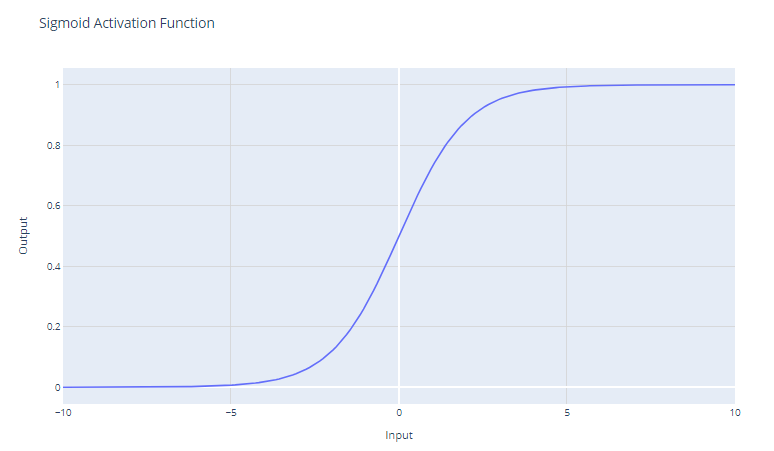

### Rectified Linear Unit (ReLU) Activation

*It thresholds the input at zero, returning 0 for negative values and the input itself for positive values. Even though ReLU is linear for half of its input space, it is technically a non-linear function because it has a non-differentiable point at x=0, where it abruptly changes from x. This non-linearity allows neural networks to learn complex patterns.*

**Mathematical Form:**

```
f(x) = max(0, x)
```

**Code:**

```
def relu(x):
    return np.maximum(0, x)
```

**Visual:**

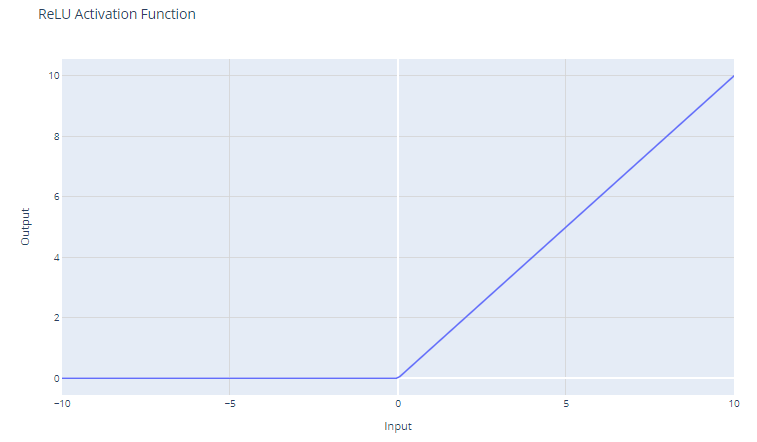



### Softmax Activation
*The softmax activation function, also known as the normalized exponential function, is particularly useful within the context of multi-class classification problems. The output of the softmax function is a probability distribution that sums up to one. Each element of the output represents the probability that the input belongs to a particular class. The use of the exponential function ensures that all output values are non-negative. This is crucial because probabilities cannot be negative.*

**Mathematical Form:**
```
f(xi) = e^xi / Σj e^xj
```

**Code:**
```
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Subtracting the maximum value for numerical stability
    return exp_x / exp_x.sum(axis=0, keepdims=True)
```

**Visual:**

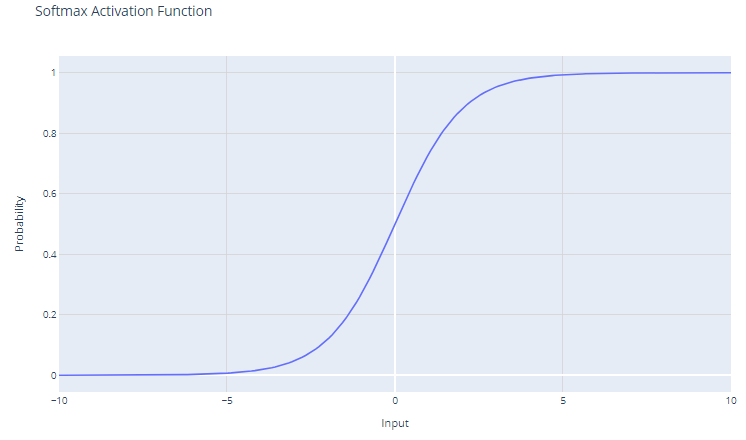


## Activation Functions: Homework


*   What is the vanishing gradient problem? Why does sigmoid function cause it?
*   Why does ReLU function help with the vanishing gradient problem?
*   What is Leaky ReLU function? What was the need for it?
*   Go through: https://keras.io/api/layers/activations/



# Finetuning a Perceptron

In [ ]:
def initialize_weights_and_bias(input_size):
    weights = [0] * input_size
    bias = 0
    return weights, bias

In [ ]:
def dot_product(weights, inputs):
    # Calculate the dot product of weights and inputs
    result = 0
    for i in range(len(weights)):
        result += weights[i] * inputs[i]
    return result

In [ ]:
def activation_function(x):
    # Simple step function: returns 1 if x is greater than or equal to 0, else 0
    return 1 if x >= 0 else 0

In [ ]:
def perceptron(weights, bias, inputs):
    # Calculate the weighted sum of inputs, add bias, and apply activation function
    summation = dot_product(weights, inputs) + bias
    return activation_function(summation)

In [ ]:
def update_weights_and_bias(weights, bias, inputs, error, learning_rate):
    # Update weights and bias based on the error (optimizer)
    for i in range(len(weights)):
        weights[i] = weights[i] + (learning_rate * error * inputs[i])
    bias += learning_rate * error
    return weights, bias

In [ ]:
def train_perceptron(weights, bias, training_data, labels, learning_rate=0.01, epochs=1000):
    for epoch in range(epochs):
        for inputs, label in zip(training_data, labels):
            prediction = perceptron(weights, bias, inputs)
            error = label - prediction
            # print(prediction, weights, bias, inputs, label, error)
            weights, bias = update_weights_and_bias(weights, bias, inputs, error, learning_rate)
    return weights, bias

In [ ]:
def print_parameters(weights, bias):
    print("Weights:", weights)
    print("Bias:", bias)

In [ ]:
#                 x1,x2   x1,x2   x1,x2   x1,x2
training_data = [[0, 0], [0, 1], [1, 0], [1, 1]] # OR Operation
#         y
labels = [0, 1, 1, 1]

# Initialize weights and bias
weights, bias = initialize_weights_and_bias(input_size=2)

# Train the perceptron
weights, bias = train_perceptron(weights, bias, training_data, labels)

# Print trained parameters
print_parameters(weights, bias)

# Test the perceptron
test_input = [1, 0]
prediction = perceptron(weights, bias, test_input)
print("Prediction for [1, 0]:", prediction)

Weights: [0.01, 0.01]
Bias: -0.01
Prediction for [1, 0]: 1


# Multi-Layer Perceptron

In [ ]:
import numpy as np

def initialize_weights_and_biases(input_size, hidden_sizes, output_size):
    # Initialize weights and biases for the MLP
    sizes = [input_size] + hidden_sizes + [output_size]
    weights = [np.random.rand(sizes[i+1], sizes[i]) - 0.5 for i in range(len(sizes)-1)]
    biases = [np.zeros((size, 1)) for size in sizes[1:]]
    return weights, biases

def sigmoid(x):
    # Sigmoid activation function
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    # Derivative of the sigmoid function
    return x * (1 - x)

def feedforward(inputs, weights, biases):
    # Perform the forward pass of the MLP
    activations = [inputs]
    for w, b in zip(weights, biases):
        inputs = sigmoid(np.dot(w, inputs) + b)
        activations.append(inputs)
    return inputs, activations

def backpropagation(inputs, outputs, targets, weights, biases, activations, learning_rate):
    # Perform backpropagation and update weights and biases
    errors = [targets - outputs]
    for i in range(len(weights)-1, 0, -1):
        error = np.dot(weights[i].T, errors[0]) * sigmoid_derivative(activations[i])
        errors.insert(0, error)

    for i in range(len(weights)):
        weights[i] += learning_rate * np.dot(errors[i] * sigmoid_derivative(activations[i+1]), activations[i].T)
        biases[i] += learning_rate * errors[i] * sigmoid_derivative(activations[i+1])

def train_mlp(inputs, targets, hidden_sizes, output_size, learning_rate=0.01, epochs=1000):
    input_size = inputs.shape[0]
    weights, biases = initialize_weights_and_biases(input_size, hidden_sizes, output_size)

    for epoch in range(epochs):
        for i in range(inputs.shape[1]):
            input_data = inputs[:, i].reshape(-1, 1)
            target = targets[:, i].reshape(-1, 1)

            outputs, activations = feedforward(input_data, weights, biases)
            backpropagation(input_data, outputs, target, weights, biases, activations, learning_rate)

    return weights, biases

# Example usage:
# XOR gate
inputs = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
targets = np.array([[0, 1, 1, 0]])

# Define MLP architecture (input_size, hidden_sizes, output_size)
hidden_sizes = [4]  # One hidden layer with 4 neurons
output_size = 1

# Train the MLP
trained_weights, trained_biases = train_mlp(inputs, targets, hidden_sizes, output_size)

# Test the trained MLP
test_input = np.array([[1], [0]])
output, _ = feedforward(test_input, trained_weights, trained_biases)
print("Prediction for [1, 0]:", output[0, 0])

Prediction for [1, 0]: 0.4844675102216174


# Recurrent Neural Networks

A recurrent neural network (RNN) is a type of artificial neural network that is used to process sequential data.

Sequential data is data that has a temporal order, such as text, speech, or music. RNNs are able to learn the temporal dependencies between the elements of a sequence, which allows them to perform tasks such as language modeling, speech recognition, and machine translation.

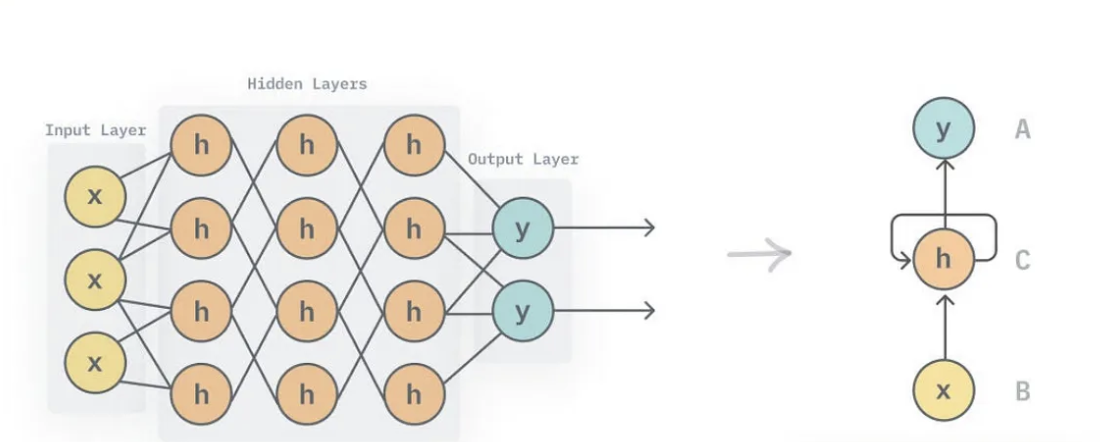

The network consists of a sequence of hidden layers, each of which has an output and a feedback connection to the previous layer. The feedback connections allow the network to remember information from previous time steps, which is essential for processing sequential data.

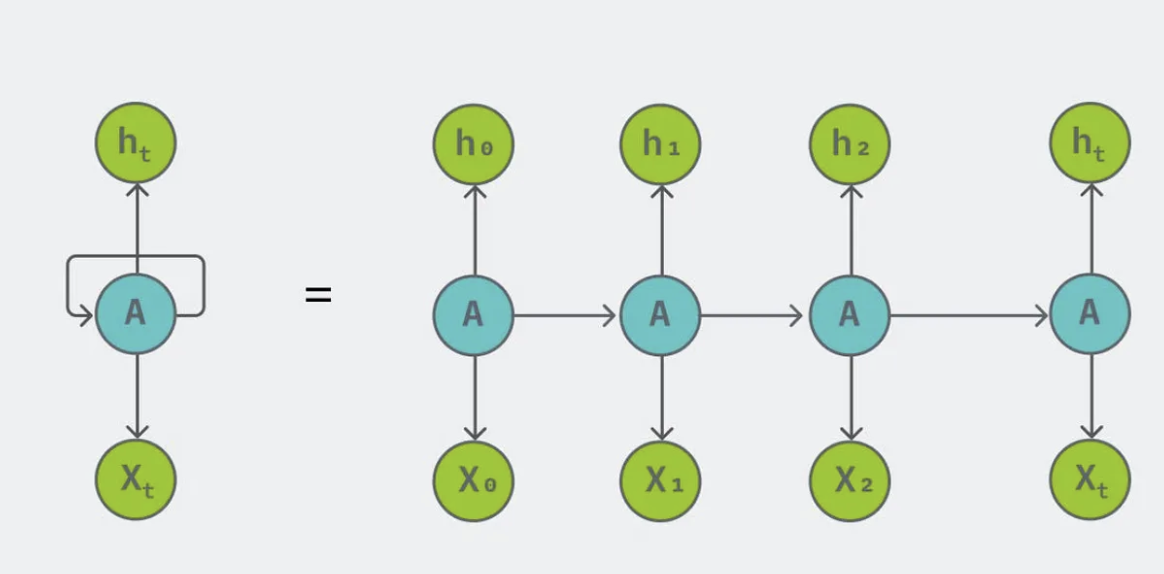

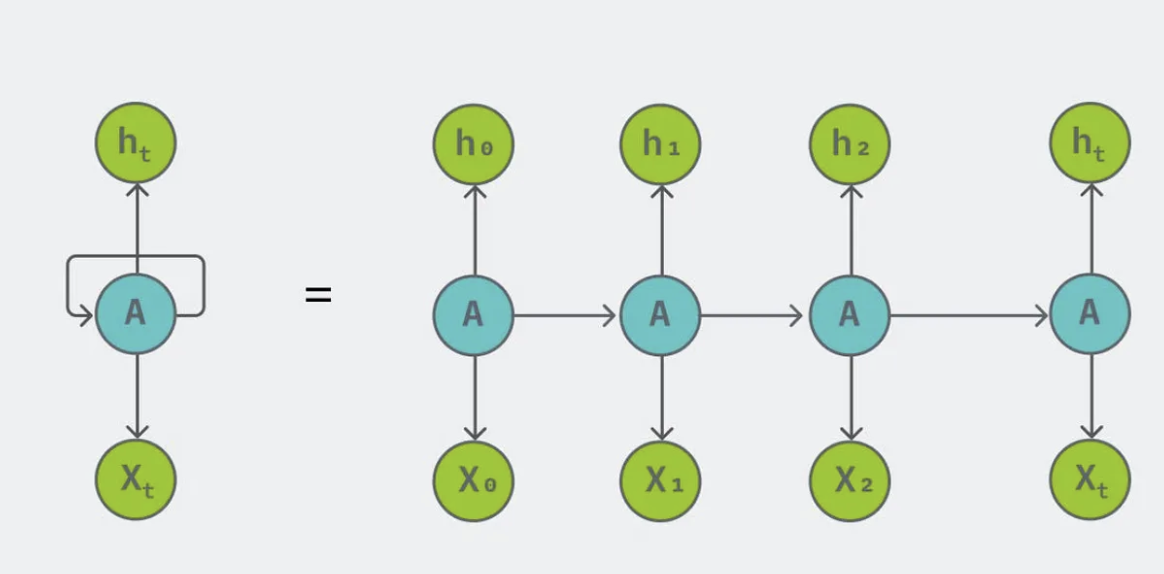

RNNs work by learning the temporal dependencies between the elements of a sequence. This is done by the feedback connections, which allow the network to remember what it has seen before. The network learns to use this information to make predictions about the current time step.


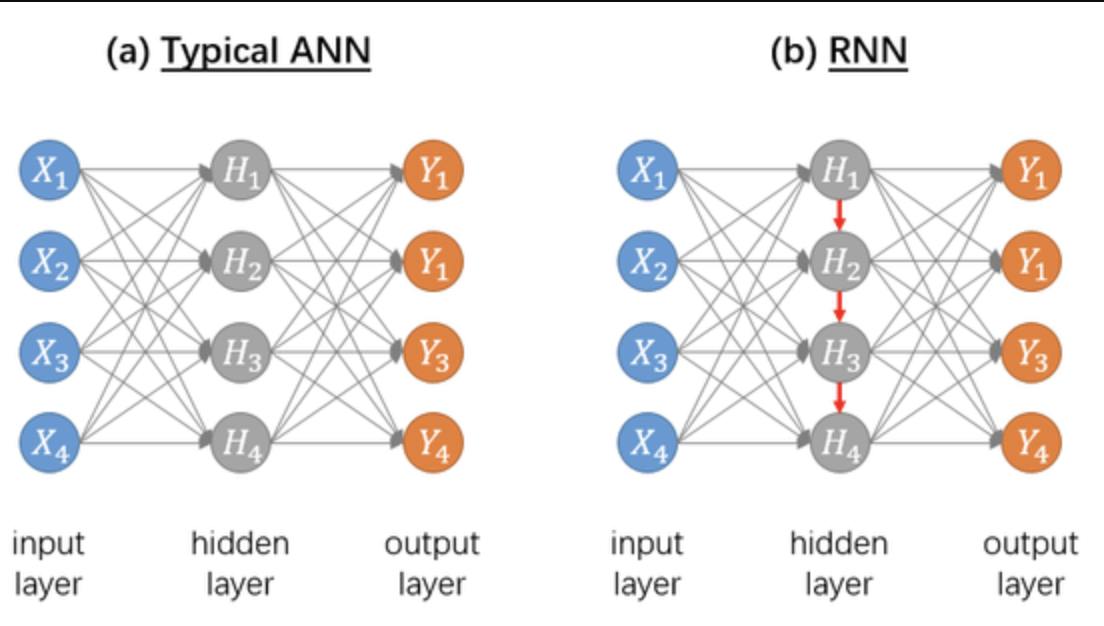

# The LSTM Cell


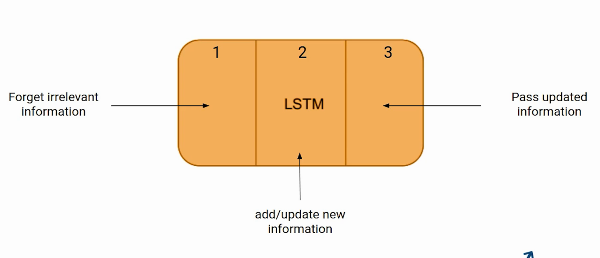

Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. They were introduced by Hochreiter & Schmidhuber (1997), and were refined and popularized by many people in following work. They work tremendously well on a large variety of problems, and are now widely used.

LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!

# RNNs in Time Series

### Setup

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import keras

### Load the data

We will be using Jena Climate dataset recorded by the Max Planck Institute for Biogeochemistry. The dataset consists of 14 features such as temperature, pressure, humidity etc, recorded once per 10 minutes.

Location: Weather Station, Max Planck Institute for Biogeochemistry in Jena, Germany

Time-frame Considered: Jan 10, 2009 - December 31, 2016
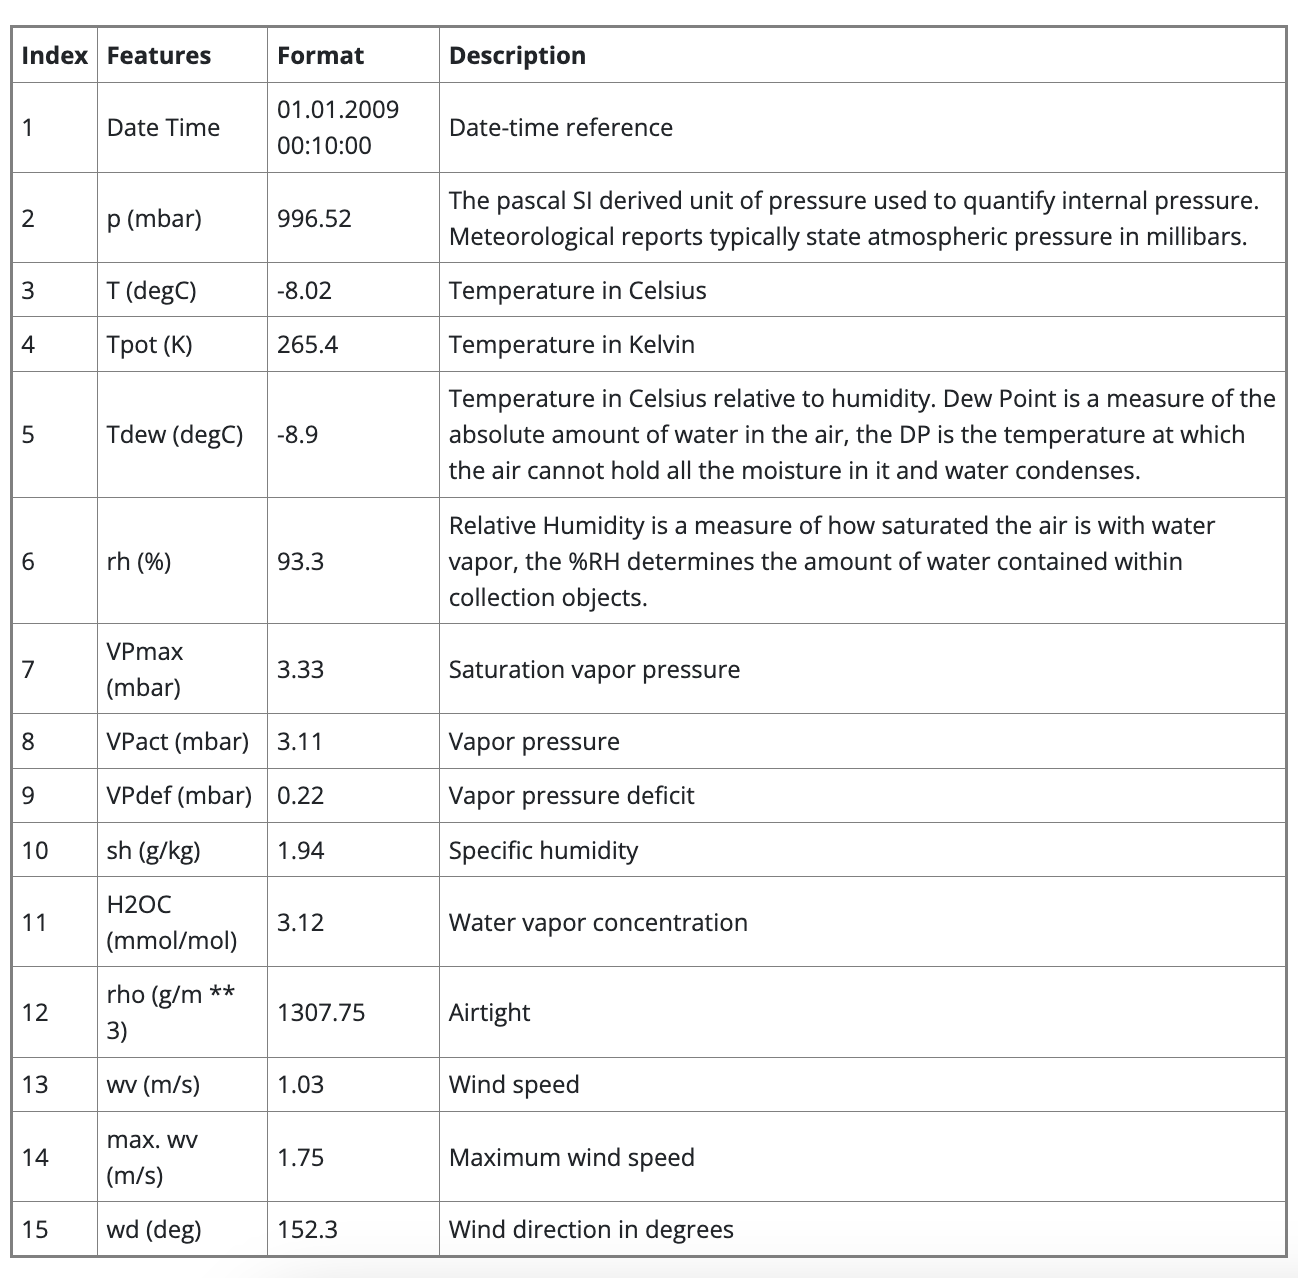


In [ ]:
from zipfile import ZipFile

uri = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"
zip_path = keras.utils.get_file(origin=uri, fname="jena_climate_2009_2016.csv.zip")
zip_file = ZipFile(zip_path)
zip_file.extractall()
csv_path = "jena_climate_2009_2016.csv"

df = pd.read_csv(csv_path)

13568290/13568290 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


### Visualize the data

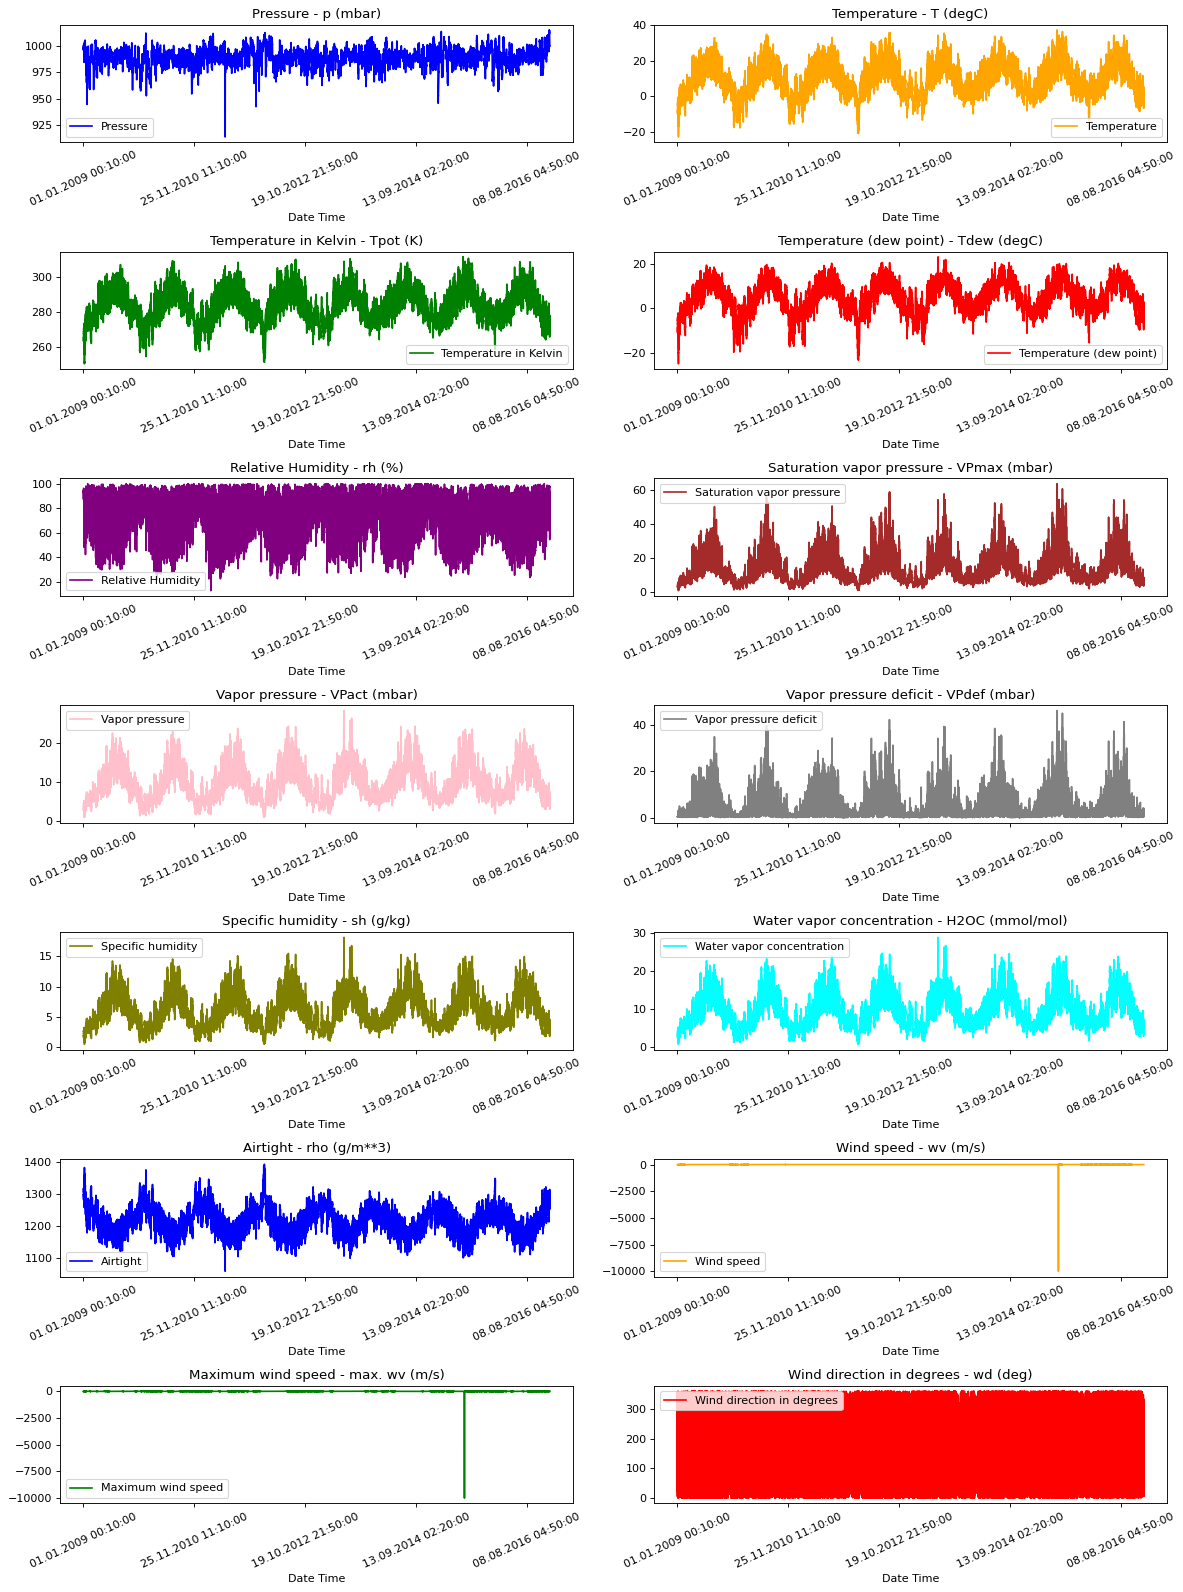

In [ ]:
titles = [
    "Pressure",
    "Temperature",
    "Temperature in Kelvin",
    "Temperature (dew point)",
    "Relative Humidity",
    "Saturation vapor pressure",
    "Vapor pressure",
    "Vapor pressure deficit",
    "Specific humidity",
    "Water vapor concentration",
    "Airtight",
    "Wind speed",
    "Maximum wind speed",
    "Wind direction in degrees",
]

feature_keys = [
    "p (mbar)",
    "T (degC)",
    "Tpot (K)",
    "Tdew (degC)",
    "rh (%)",
    "VPmax (mbar)",
    "VPact (mbar)",
    "VPdef (mbar)",
    "sh (g/kg)",
    "H2OC (mmol/mol)",
    "rho (g/m**3)",
    "wv (m/s)",
    "max. wv (m/s)",
    "wd (deg)",
]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

date_time_key = "Date Time"


def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=7, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()


show_raw_visualization(df)

### Standardize the data

In [ ]:
split_fraction = 0.715
train_split = int(split_fraction * int(df.shape[0]))
step = 6

past = 720
future = 72
learning_rate = 0.001
batch_size = 256
epochs = 10


def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std

print(
    "The selected parameters are:",
    ", ".join([titles[i] for i in [0, 1, 5, 7, 8, 10, 11]]),
)
selected_features = [feature_keys[i] for i in [0, 1, 5, 7, 8, 10, 11]]
features = df[selected_features]
features.index = df[date_time_key]
features.head()

features = normalize(features.values, train_split)
features = pd.DataFrame(features)
features.head()

train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

The selected parameters are: Pressure, Temperature, Saturation vapor pressure, Vapor pressure deficit, Specific humidity, Airtight, Wind speed


In [ ]:
features.head()

,0,1,2,3,4,5,6
0,0.955451,-2.000020,-1.319782,-0.788479,-1.500927,2.237658,-0.732997
1,0.961528,-2.045185,-1.332806,-0.790561,-1.519521,2.287838,-0.936002
2,0.956666,-2.056766,-1.335410,-0.792642,-1.523239,2.298608,-1.283076
3,0.954236,-2.033604,-1.328898,-0.794724,-1.508364,2.272906,-1.184847
4,0.954236,-2.028972,-1.327596,-0.794724,-1.508364,2.268256,-1.197944


### Training Dataset

The timeseries_dataset_from_array function takes in a sequence of data-points gathered at equal intervals, along with time series parameters such as length of the sequences/windows, spacing between two sequence/windows, etc., to produce batches of sub-timeseries inputs and targets sampled from the main timeseries.



In [ ]:
start = past + future
end = start + train_split

x_train = train_data[[i for i in range(7)]].values
y_train = features.iloc[start:end][[1]]

sequence_length = int(past / step)

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [ ]:
y_train.head()

,1
792,-2.745821
793,-2.701814
794,-2.641594
795,-2.597587
796,-2.509573


In [ ]:
type(dataset_train)

tensorflow.python.data.ops.batch_op._BatchDataset

### Validation dataset

In [ ]:
x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end][[i for i in range(7)]].values
y_val = features.iloc[label_start:][[1]]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (256, 120, 7)
Target shape: (256, 1)


### Training

In [ ]:
## Defining the layers
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

## Defining their interaction (Model)
model = keras.Model(inputs=inputs, outputs=outputs)

## Define model parameters - how will be evaluated, optimized
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 7)]          0         
                                                                 
 lstm (LSTM)                 (None, 32)                5120      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 5153 (20.13 KB)
Trainable params: 5153 (20.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
path_checkpoint = "model_checkpoint.weights.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/10
1172/1172 [==============================] - ETA: 0s - loss: 0.1996
Epoch 1: val_loss improved from inf to 0.16075, saving model to model_checkpoint.weights.h5
1172/1172 [==============================] - 163s 137ms/step - loss: 0.1996 - val_loss: 0.1608
Epoch 2/10
1172/1172 [==============================] - ETA: 0s - loss: 0.1270
Epoch 2: val_loss improved from 0.16075 to 0.13582, saving model to model_checkpoint.weights.h5
1172/1172 [==============================] - 157s 134ms/step - loss: 0.1270 - val_loss: 0.1358
Epoch 3/10
1172/1172 [==============================] - ETA: 0s - loss: 0.1117
Epoch 3: val_loss did not improve from 0.13582
1172/1172 [==============================] - 161s 137ms/step - loss: 0.1117 - val_loss: 0.1458
Epoch 4/10
1172/1172 [==============================] - ETA: 0s - loss: 0.1092
Epoch 4: val_loss did not improve from 0.13582
1172/1172 [==============================] - 159s 135ms/step - loss: 0.1092 - val_loss: 0.1476
Epoch 5/10
1172/1172 [

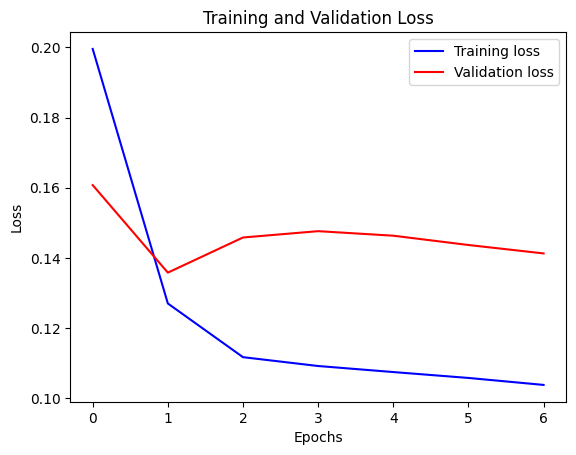

In [ ]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

### Prediction

8/8 [==============================] - 1s 11ms/step


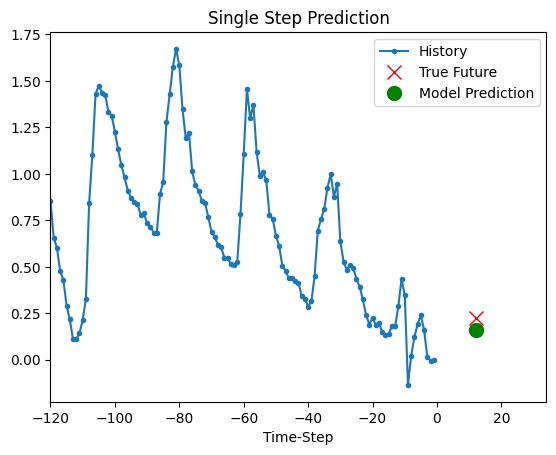

8/8 [==============================] - 0s 11ms/step


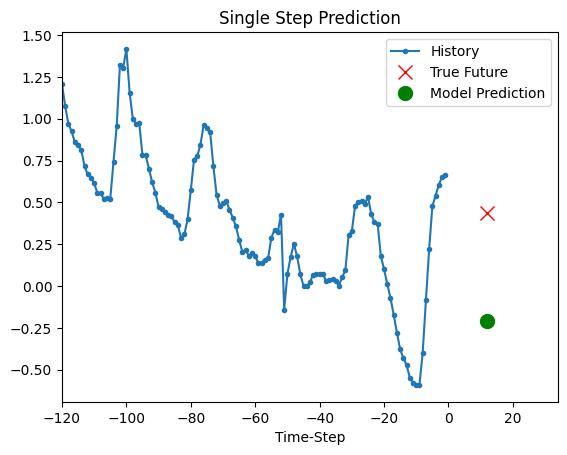

8/8 [==============================] - 0s 11ms/step


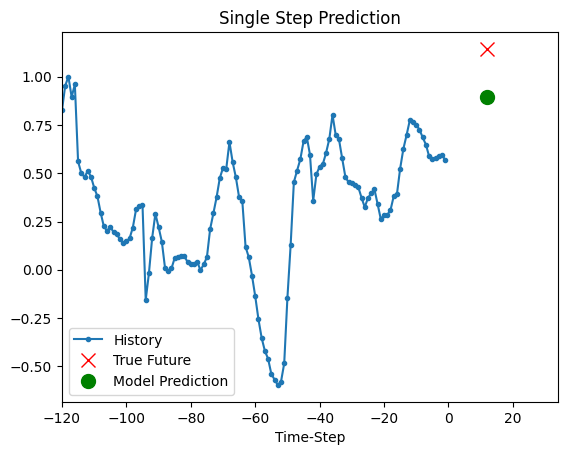

8/8 [==============================] - 0s 11ms/step


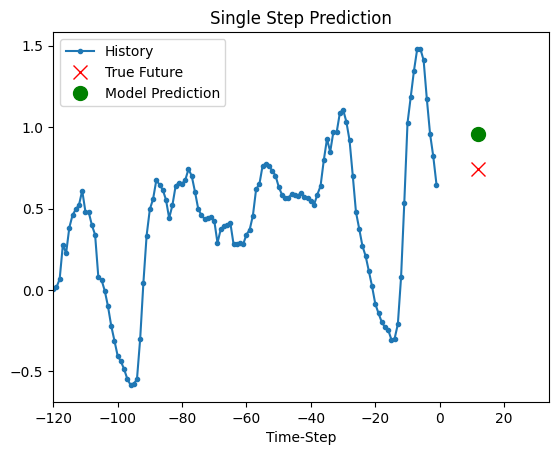

8/8 [==============================] - 0s 12ms/step


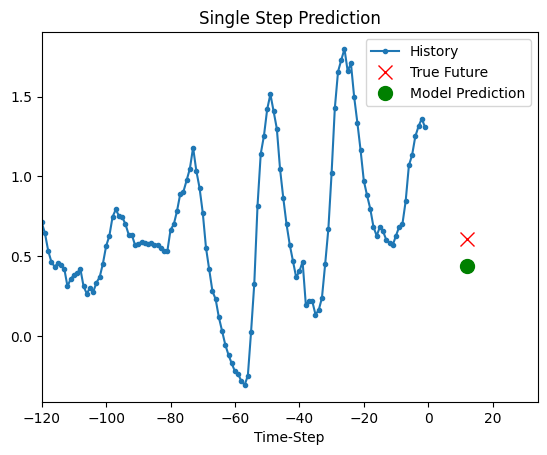

In [ ]:
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return


for x, y in dataset_val.take(5):
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        12,
        "Single Step Prediction",
    )